# **In this notebook I intend to explore a dataset looking at different types of Ramen. I intend to do some basic exploratory data analysis and see what I can learn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.size'] = '15'

In [2]:
df=pd.read_csv('ramen-ratings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Concerned that some of the catergories I would expect to be numeric are objects, espcially the stars

In [4]:
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [5]:
df.Stars.replace('Unrated',np.nan,inplace=True)

In [6]:
df['Stars'] = pd.to_numeric(df.Stars)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


Thats better, now the stars are listed as numeric, lets recheck the dataframe

In [7]:
df.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


**Initial thoughts**

The review number column appears to just be an index so I will drop that. It seems like we could have a lot of infomation in the Variety column so it would be good to do some feature extraction on that. First, however, I want to do some basic exploratory data analysis to better understand the raw data

In [8]:
df.drop('Review #',axis=1,inplace=True)

In [9]:
print('The number of unique Brands is '+ str(len(df.Brand.unique())))
print('The number of unique countrys is '+ str(len(df.Country.unique())))

The number of unique Brands is 355
The number of unique countrys is 38


In [10]:
df_sorted = df.groupby('Country').count().sort_values('Brand',ascending=False).Brand

In [11]:
df_sorted = df_sorted.reset_index().copy()

<BarContainer object of 38 artists>

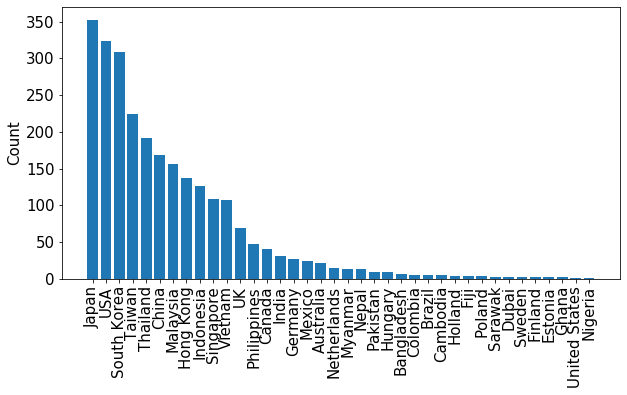

In [12]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.bar(df_sorted.Country,df_sorted.Brand)

**Now I want to see the average ramen rating per country, and also add infomation on how many ramens are produced per country**

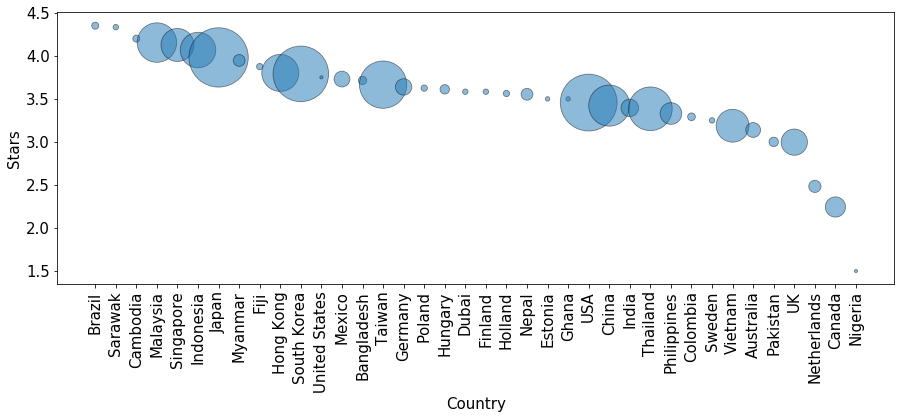

In [13]:
df_ave_stars= df[['Country','Stars']].groupby('Country').mean().sort_values('Stars',ascending=False).reset_index()
df_joined = df_ave_stars.set_index('Country').join(df_sorted.set_index('Country')).reset_index()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
sizes = dict(zip(df_joined.Country,df_joined.Brand.values*10))
sns.scatterplot('Country','Stars', data=df_joined,
                size='Country',
                sizes=sizes,
                legend=False,
                alpha=0.5,
                edgecolor='black',
                palette = 'Set1'
                )


/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number')

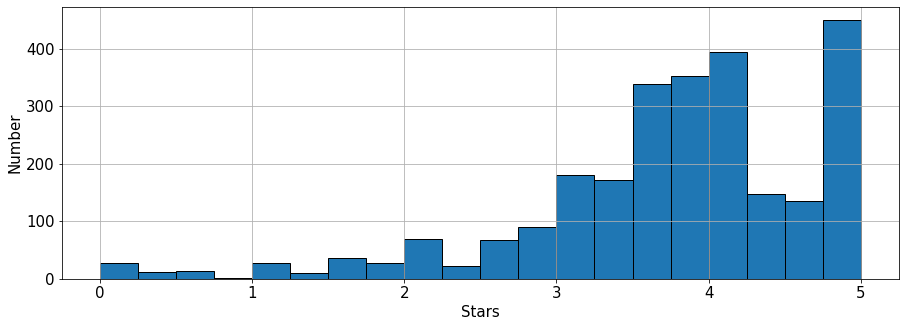

In [14]:
plt.figure(figsize=(15,5))
plt.grid()
plt.hist(df.Stars,bins=20,edgecolor='k',align='mid')
plt.xlabel('Stars')
plt.ylabel('Number')

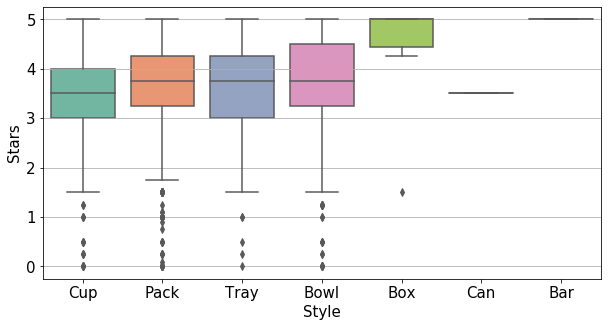

In [15]:
df_ave_stars_style = df[['Style','Stars']].groupby('Style').mean().sort_values('Stars',ascending=False).reset_index()
plt.figure(figsize=(10,5))
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
plt.grid()
sns.boxplot(df.Style,df.Stars,palette = 'Set2')


# Now to do some feature extraction from the variety column. It would be good to try and get an idea of flavour

**First I need to remove the punctuation**

In [16]:
import string 
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [17]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_punctuation(x.lower()))

**Now to remove stopwords such as 'the', 'and' etc...**

In [18]:
from nltk.tokenize import RegexpTokenizer

In [19]:
tokenizer = RegexpTokenizer(r'\w+')
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [20]:
df.Variety

0                             [ts, restaurant, tantanmen]
1       [noodles, spicy, hot, sesame, spicy, hot, sesa...
2                      [cup, noodles, chicken, vegetable]
3                     [gge, ramen, snack, tomato, flavor]
4                                      [singapore, curry]
                              ...                        
2575    [hu, tiu, nam, vang, phnom, penh, style, asian...
2576                  [oriental, style, instant, noodles]
2577                                   [tom, yum, shrimp]
2578                            [tom, yum, chili, flavor]
2579                                        [miso, ramen]
Name: Variety, Length: 2580, dtype: object

In [21]:
from nltk.corpus import stopwords
specified_extra = ['noodles','noodle','flavour','artificial','ramen','instant','flavor','sauce','cup','bowl','rice']
def remove_stopwords(text):
    english_words = [w for w in text if w not in stopwords.words('english')]
    additional_words = [w for w in english_words if w not in specified_extra]
    return additional_words

In [22]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_stopwords(x))

**Now to recombine for analysis. I also take the opportunity to remove any repeats in the lists, before recombining**

In [23]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: list(set(x)))
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x:" ".join(x))

In [24]:
# Begin vectorisation
from sklearn.feature_extraction.text import CountVectorizer

Specifiy the number of words to list

In [25]:
# Might take awhile...
max_feature_length = 10
top_words = []


Now to generate the sparce matrix with all the top words contained

In [26]:

bow_transformer = CountVectorizer(max_features=max_feature_length,ngram_range=(1,1)).fit(df.loc[:,'Variety'])
bow = bow_transformer.transform([' '.join(df.loc[:,'Variety'].values)])#This joins all the words in all the rows 


Now to extract the top words and counts 

In [27]:

word_list = bow_transformer.get_feature_names()
count_list = bow.toarray().sum(axis=0) 
top_counts = pd.DataFrame(zip(word_list,count_list),columns=['term','count',])
top_counts.sort_values('count',axis=0,inplace=True, ascending=False)




In [28]:
top_counts

,term,count
1,chicken,328
8,spicy,269
0,beef,232
7,soup,196
9,tom,128
6,shrimp,127
2,curry,125
3,hot,118
4,mi,117
5,seafood,109


Create a new column with the flavours identified

In [29]:
df['flavour'] = df.Variety.apply(lambda y: np.array([x for x in y.split() if x in top_counts.term.values]))
df['flavour'] = df['flavour'].apply(lambda x :" ".join(x))

## Now I have the flavours identified, I want to see how it varies with the rating

First I create a new dataframe, with the flavours spilt and add the rating column 

In [30]:
flavour = df['flavour'].str.split(' ', 3,expand=True)

In [31]:
flavour['stars'] = df['Stars']
flavour.replace('',np.nan,inplace=True)
flavour.replace('tom','tom yum',inplace=True) # Change tom to tom yum 

In [32]:
flavour['flavour'] = flavour.iloc[:,0]

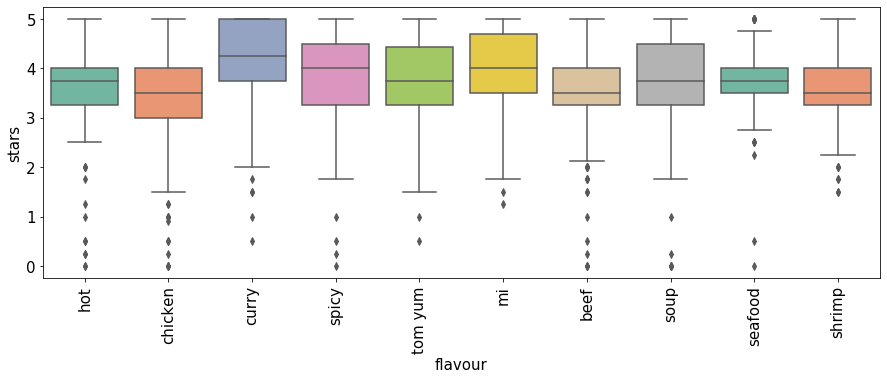

In [33]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot('flavour','stars',data=flavour, palette = 'Set2')

**It seems that curry noodles are often rated highly. Seafood and shrimp along with chicken seem to be generally worse.** Seeing as some rows also have secondary flavours, this could be a great predictor of ratings, along with country, style and brand.

## From here I begin to make dummy variables for the flavour and try and predict the rating.

Now to create dummy variables for the top words found

As there are a large number of countries and brands I use the BaseN encoder to reduce the dimentionality. For style I simply use get dummies.

In [142]:
import category_encoders as ce

In [143]:
encoder = ce.BaseNEncoder(cols=['Brand'],return_df=True,base=2)
data_encoded_brand = encoder.fit_transform(df.Brand)

In [144]:
encoder = ce.BaseNEncoder(cols=['Country'],return_df=True,base=2)
data_encoded_Country = encoder.fit_transform(df.Country)

In [145]:
data_encoded_styles = pd.get_dummies(data=df.Style,drop_first=True)

In [146]:
encoder = ce.BaseNEncoder(cols=['flavour'],return_df=True,base=2)
data_encoded_flavour = encoder.fit_transform(flavour.flavour)

In [147]:
final_cleaned = data_encoded_flavour.join(data_encoded_brand).join(data_encoded_styles).join(data_encoded_Country)
final_cleaned['Stars'] = df.Stars

Now to check that all columns are numeric and ready to be used in prediction

In [148]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flavour_0  2580 non-null   int64  
 1   flavour_1  2580 non-null   int64  
 2   flavour_2  2580 non-null   int64  
 3   flavour_3  2580 non-null   int64  
 4   flavour_4  2580 non-null   int64  
 5   Brand_0    2580 non-null   int64  
 6   Brand_1    2580 non-null   int64  
 7   Brand_2    2580 non-null   int64  
 8   Brand_3    2580 non-null   int64  
 9   Brand_4    2580 non-null   int64  
 10  Brand_5    2580 non-null   int64  
 11  Brand_6    2580 non-null   int64  
 12  Brand_7    2580 non-null   int64  
 13  Brand_8    2580 non-null   int64  
 14  Brand_9    2580 non-null   int64  
 15  Bowl       2580 non-null   uint8  
 16  Box        2580 non-null   uint8  
 17  Can        2580 non-null   uint8  
 18  Cup        2580 non-null   uint8  
 19  Pack       2580 non-null   uint8  
 20  Tray    

Flavour_0, Brand_0 and Country_0 all appear to have no values

In [149]:
final_cleaned.drop(['flavour_0','Brand_0','Country_0'],axis=1,inplace=True)

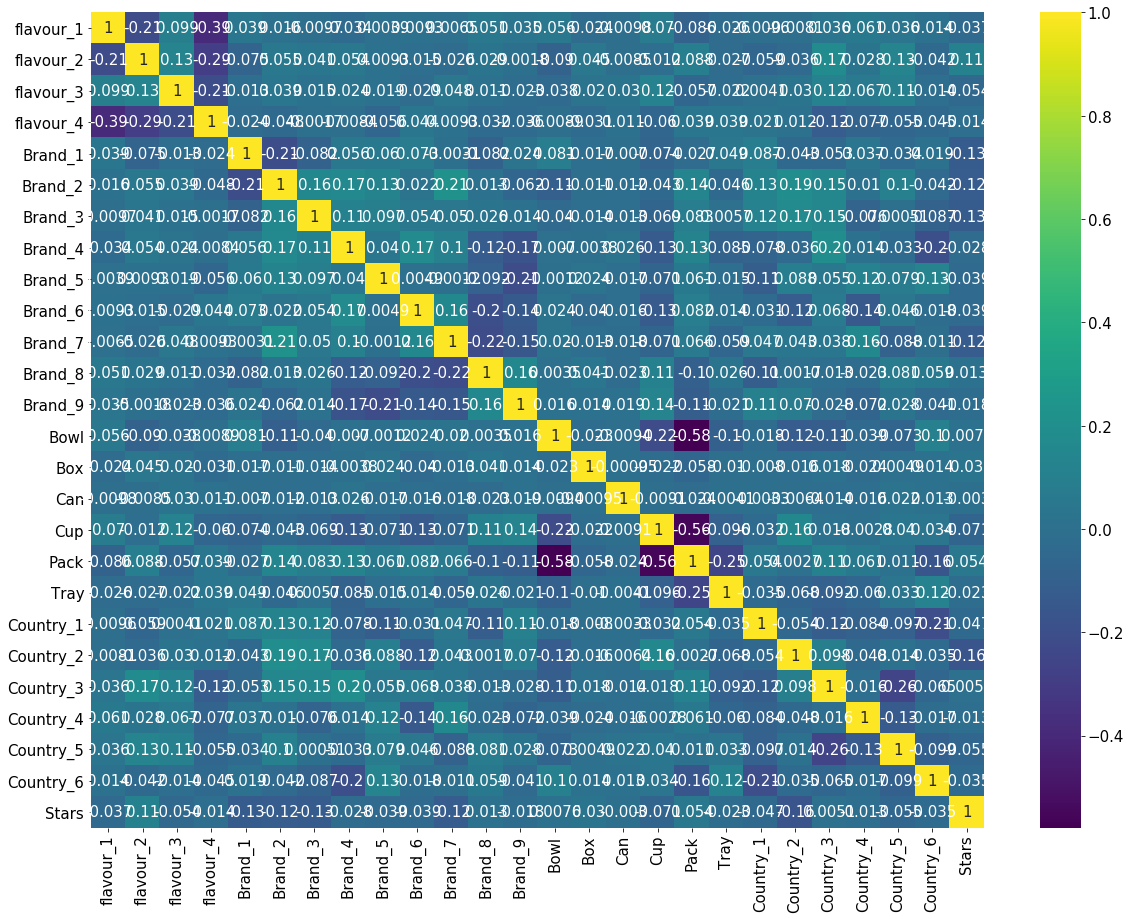

In [151]:
plt.figure(figsize=(20,15))
sns.heatmap(final_cleaned.corr(),annot=True,cmap='viridis')

(-0.2, 0.2)

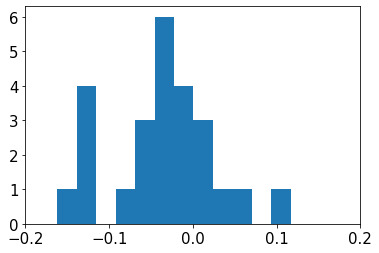

In [152]:
plt.hist(final_cleaned.corr().Stars.values,bins=50)
plt.xlim([-0.2,0.2])

**Overall it actually seems like nothing is very correlated to stars, it therefore seems like machine learning models may struggle to predict the rating of Ramen.** Nonetheless, I apply some to confirm this hypothesis.

# Now to employ some ML techniques to predict the rating 

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [154]:
final_cleaned.dropna(inplace=True)
x = final_cleaned.iloc[:,0:-1].values
y = final_cleaned.Stars.values

In [155]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state = 2,test_size=0.2,)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [156]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_test)

In [157]:
# Now to check the result
from sklearn.metrics import mean_squared_error 
from math import sqrt
train_error = sqrt(mean_squared_error(y_train,model.predict(x_train))) 
test_error = sqrt(mean_squared_error(y_test,model.predict(x_test)))
print('The train error is {0:.2f} and the test error is {1:.2f}'.format(train_error,test_error))


The train error is 0.95 and the test error is 1.01


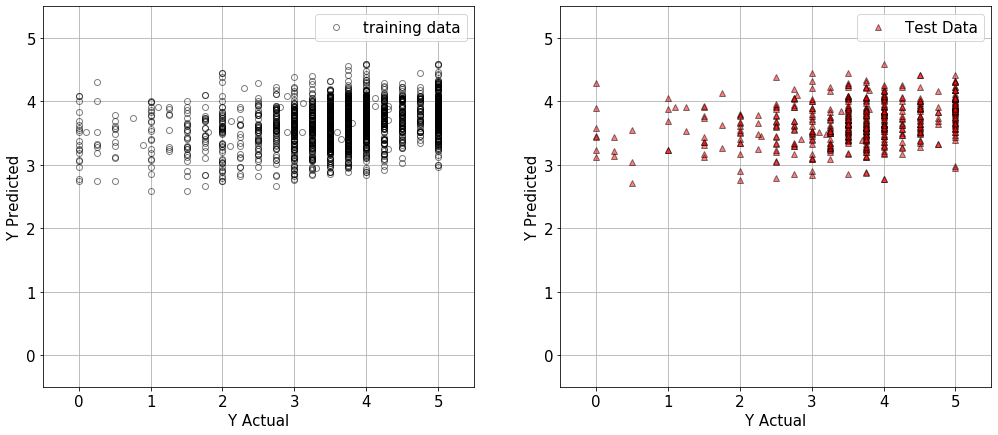

In [159]:
fig, ax = plt.subplots(1,2,figsize=(17,7))
ax[0].plot(y_train,model.predict(x_train),
         alpha=0.5,
         marker='o',
         mec='k',
         mfc='none',
         linestyle='none',
        label='training data')
ax[1].plot(y_test,y_predict,
         color='red',
         alpha=0.5,
         marker='^',
         mec='k',
         linestyle='none',
        label='Test Data')
for i in ax[0],ax[1]:
    i.set_xlim([-0.5,5.5])
    i.set_xlabel('Y Actual')
    i.set_ylabel('Y Predicted')
    i.set_ylim([-0.5,5.5])
    i.grid()
    i.legend()

**looks like the model is slightly overfitting, lets see if we can use ridge regression to regularise the model**

In [163]:
# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(x_train,y_train).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(x_train,y_train).best_score_)

The best value of alpha is: {'alpha': 20}
The best score for the best Ridge estimator is: -0.9277686980494939


In [164]:
# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge
# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=20)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(x_train,y_train)
Ridge_error = sqrt(mean_squared_error(y_train,model.predict(x_train))) 
test_error = sqrt(mean_squared_error(y_test,y_predict))
print('The OLS error is {0:.2f} and the Ridge error is {1:.2f}'.format(sqrt(train_error),sqrt(test_error)))

The OLS error is 0.98 and the Ridge error is 1.00


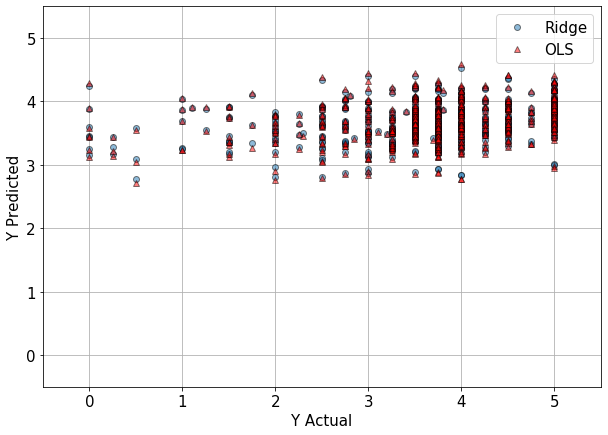

In [166]:
plt.figure(figsize=(10,7))
plt.plot(y_test,best_ridge_coeffs.predict(x_test),
         alpha=0.5,
         marker='o',
         mec='k',
         linestyle='none',
        label='Ridge')
plt.plot(y_test,y_predict,
         color='red',
         alpha=0.5,
         marker='^',
         mec='k',
         linestyle='none',
        label='OLS')
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])
plt.grid()
plt.legend()

Regularisation reduces overfitting by ~0.01, lets try another ML method.

My initial thoughts are that the catergorical variables are poor predictors on their own and that ML may struggle with this problem.

In [49]:
from sklearn import neighbors

In [50]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.1925326852654214
RMSE value for k=  2 is: 1.06875481661728
RMSE value for k=  3 is: 1.0355184838339473
RMSE value for k=  4 is: 1.008085912149468
RMSE value for k=  5 is: 1.0124990668959237
RMSE value for k=  6 is: 0.9977765002196692
RMSE value for k=  7 is: 0.9930465787036795
RMSE value for k=  8 is: 0.9858978987489068
RMSE value for k=  9 is: 0.9896242587152204
RMSE value for k=  10 is: 0.9816551156024055
RMSE value for k=  11 is: 0.9788694917778876
RMSE value for k=  12 is: 0.9820770880001584
RMSE value for k=  13 is: 0.9819318183685153
RMSE value for k=  14 is: 0.9869474779173701
RMSE value for k=  15 is: 0.9834405681028852
RMSE value for k=  16 is: 0.9851181686754854
RMSE value for k=  17 is: 0.9816064050619125
RMSE value for k=  18 is: 0.9806484586619337
RMSE value for k=  19 is: 0.9805906916957889
RMSE value for k=  20 is: 0.9829564714584145


(-0.5, 5.5)

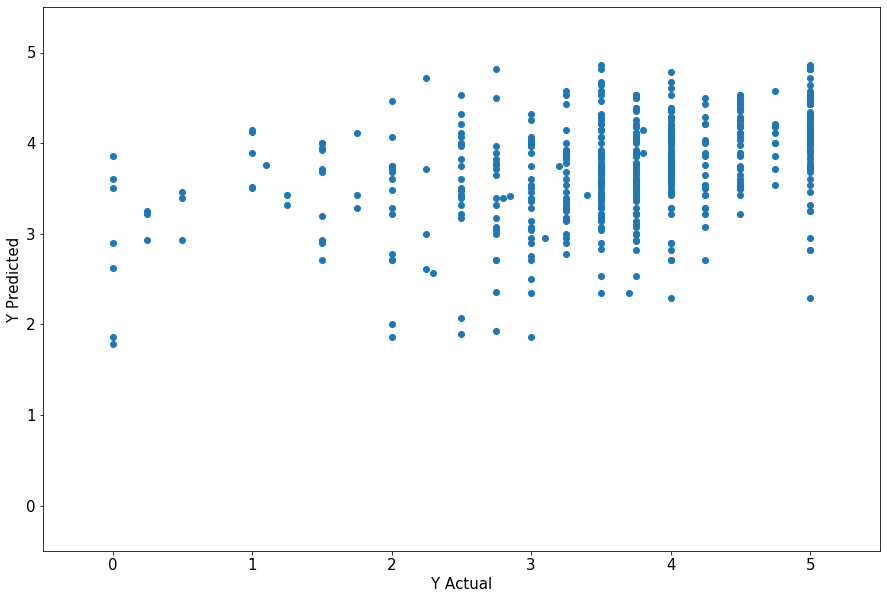

In [167]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)  #fit the model
y_predict_KNN = model.predict(x_test) #make prediction on test set
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict_KNN)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

**Now I use a random forest to see if that improves anything**

I use RandomisedSearchCV to explore the hyperparameters for n_estimators, max_features and max_depth

In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
RFR = RandomForestRegressor()
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 5)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features' : max_features,
 'max_depth': max_depth
 }
# Random search of parameters
RFR_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=2,n_jobs=-1)
# Fit the model
RFR_random.fit(x_train, y_train)
# print results
print(RFR_random.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.5min finished


{'n_estimators': 1550, 'max_features': 'sqrt', 'max_depth': 400}


In [192]:
RFR = RandomForestRegressor(n_estimators=1550, max_depth=400, max_features='sqrt')
RFR.fit(x_train,y_train)
RFR_predict = RFR.predict(x_test)

(-0.5, 5.5)

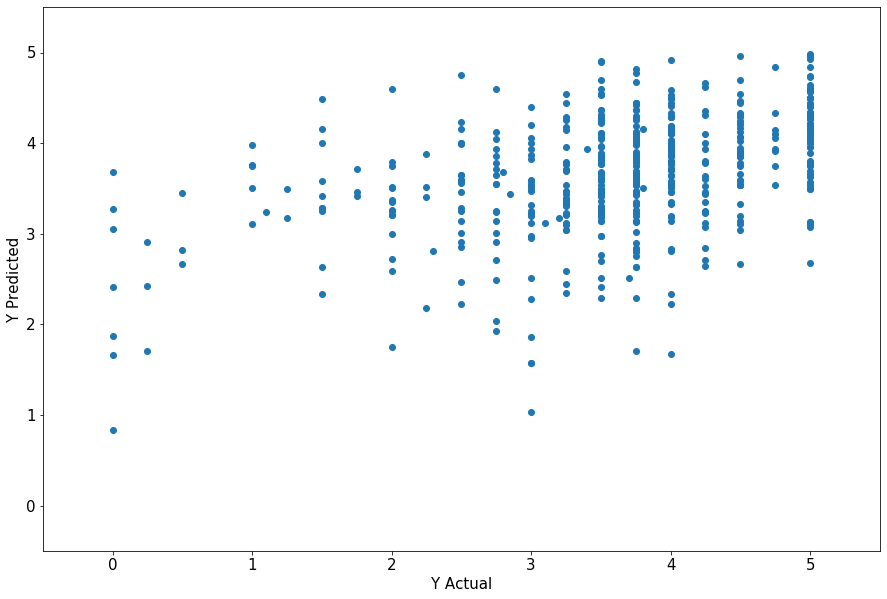

In [193]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,RFR_predict)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

**As I expected the traditional machine learning models struggle to predict the rating of the ramen. We could try deep learning here to confirm this, but i'm not too hopeful**

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/louismclaxton/anaconda3/l

In [53]:
model = Sequential()
model.add(Dense(210, input_dim=410, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation= "relu"))
model.add(Dense(5, activation= "relu"))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [54]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(x_train, y_train, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2061/2061 [==============================] - 0s 173us/step - loss: 7.4406 - mean_squared_error: 7.4406
Epoch 2/100
2061/2061 [==============================] - 0s 74us/step - loss: 1.4248 - mean_squared_error: 1.4248
Epoch 3/100
2061/2061 [==============================] - 0s 72us/step - loss: 1.1875 - mean_squared_error: 1.1875
Epoch 4/100
2061/2061 [==============================] - 0s 70us/step - loss: 1.1664 - mean_squared_error: 1.1664
Epoch 5/100
2061/2061 [==============================] - 0s 75us/step - loss: 1.0736 - mean_squared_error: 1.0736
Epoch 6/100
2061/2061 [==============================] - 0s 73us/step - loss: 0.9916 - mean_squared_error: 0.9916
Epoch 7/100
2061/2061 [==============================] - 0s 71us/step - loss: 0.9676 - mean_squared_error: 0.9676
Epoch 8/100
2061/2061 [==============================] - 0s 74us/step - loss: 0.9237 - mean_squared_error: 0.9237
Epoch 9/100
2061/2061 [================

2061/2061 [==============================] - 0s 73us/step - loss: 0.4240 - mean_squared_error: 0.4240
Epoch 70/100
2061/2061 [==============================] - 0s 70us/step - loss: 0.4491 - mean_squared_error: 0.4491
Epoch 71/100
2061/2061 [==============================] - 0s 69us/step - loss: 0.4311 - mean_squared_error: 0.4311
Epoch 72/100
2061/2061 [==============================] - 0s 71us/step - loss: 0.4308 - mean_squared_error: 0.4308
Epoch 73/100
2061/2061 [==============================] - 0s 72us/step - loss: 0.4306 - mean_squared_error: 0.4306
Epoch 74/100
2061/2061 [==============================] - 0s 71us/step - loss: 0.4163 - mean_squared_error: 0.4163
Epoch 75/100
2061/2061 [==============================] - 0s 70us/step - loss: 0.4318 - mean_squared_error: 0.4318
Epoch 76/100
2061/2061 [==============================] - 0s 70us/step - loss: 0.4264 - mean_squared_error: 0.4264
Epoch 77/100
2061/2061 [==============================] - 0s 69us/step - loss: 0.4142 - mean_

In [55]:
pred_train= model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))
y_pred_NN = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.5838214630473287
0.9829564714584145


Seems the model may be slightly over fitting the data given the MSE is higher for the test set. This could also be a result of having such a small dataset for trying to use a ANN.

Text(0, 0.5, 'MSE')

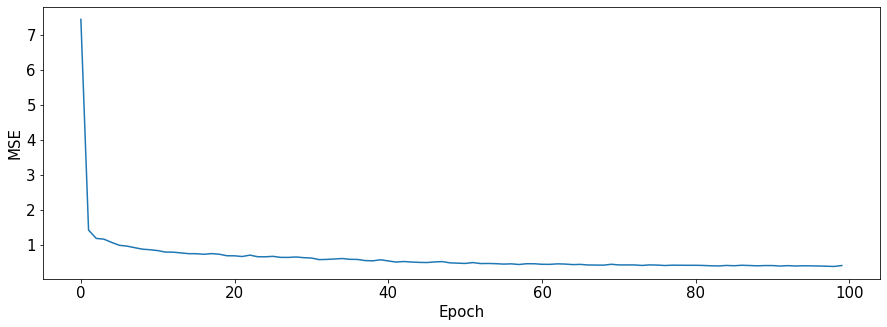

In [56]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,100),history.history.get('loss'))
plt.xlabel('Epoch')
plt.ylabel('MSE')

(-0.5, 5.5)

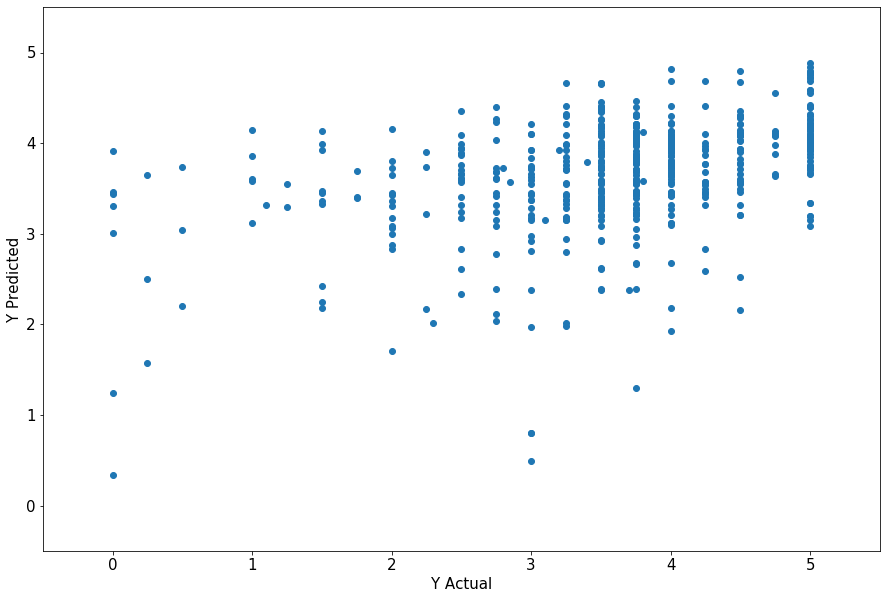

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_NN)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

Overall given the lack of correlation between the predictors and the rating it has proved hard to generate an accurate machine learning model. Moreover, given the size of the dataset its hard to use complex methods such as ANNs to predict well the rating. Since the overall size of the dataset is small, there is likely to be a considerable about of noise in the data. That and the number of features is large in comparison to the entries.

Nonetheless, its been fun to use some NLP, ML and generally explore the Ramen Data set.

